In [122]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from celluloid import Camera
import scipy as sp
from scipy import integrate

ModuleNotFoundError: No module named 'celluloid'

# 1.2 Presentación de funciones

In [123]:
def GetFourier(t,T,N):
    
    a0, error0 = integrate.quad( lambda t: f(t), -0.5*T , 0.5*T )
    a0 *= 2./T
    
    y = a0
    
    for n in range(1,N):
        an, erroran = integrate.quad( lambda t: f(t)*np.cos( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        bn, errorbn = integrate.quad( lambda t: f(t)*np.sin( (2*np.pi*n*t)/T ), -0.5*T , 0.5*T )
        y += 2.*an*np.cos( (2*np.pi*n*t)/T )/T + 2.*bn*np.sin( (2*np.pi*n*t)/T )/T 
        
    return y

In [124]:
def f(t):
    return t

In [125]:
t = np.arange(-10,10,0.01)

In [126]:
fig = plt.figure()
camera = Camera(fig)
for i in range(2,50):
    y = GetFourier(t,2*np.pi,i)
    plt.plot(t,y,color='k')
    camera.snap()
animation = camera.animate()
animation.save('Serie de Fourier.gif', writer = 'imagemagick')

NameError: name 'Camera' is not defined

<Figure size 432x288 with 0 Axes>

# 1.3 Función $\zeta(s)$ de Riemann

En primer lugar tenemos nuestra función definida como:
$f(t) = \frac{t}{12} (t^2 - \pi^2)$; y con la identidad de Parseval hallamos la relación:
$\zeta(6) = \frac{\pi^6}{945} = \sum_{n = 1}^{\infty}\frac{1}{n^6}$
(Tomado del punto 1.3.1 que se encuentra en el pdf).  
Ahora bien, al usar de la identidad de Parseval vimos que:  
$ \sum_{n = 1}^{\infty}b_{n}^2 = \sum_{n = 1}^{\infty}\frac{1}{n^6} = \zeta(6)$  
Ahora bien, para estimar numéricamente la función $\zeta(6)$ de Riemann, podemos hallar estos $b_{n}$, y seguidamente la sumatoria de los cuadrados de los $b_{n}$  

Sumatoria A: $\sum_{n = 1}^{\infty}\frac{1}{n^6}$  

Sumatoria B: $ \sum_{n = 1}^{\infty}b_{n}^2$

In [127]:
def f(t):
    f = (t/12)*(t**2 - np.pi**2)
    return f

In [128]:
def fourier(t,T,N):
    bns = 0
    L = T/2
    for n in range(1,N):
        bn, error = integrate.quad(lambda t:f(t)*np.sin(n*np.pi*t/L), -L,L) 
        bnc = (bn/L)**2
        bns += bnc
    return bns

El valor estimado para la función es: 1.0173430618696393
La diferencia entre el valor obtenido por la sumatoria A (realizada con un rango de 1 a 1 millón) y la sumatoria B es: 1.1480172368294461e-10, siendo más exacto el valor obtenido con la sumatoria A, esto por la limitación en el rango.


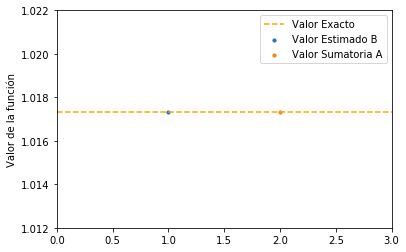

In [129]:
t = np.arange(-np.pi,np.pi,0.01)
T = 2*np.pi
N = 71
est = fourier(t,T,N)
print("El valor estimado para la función es: {}".format(est))

valorexacto = (np.pi**6)/945

def sumatoria(k):
    suma = 0
    for i in range(1,k):
        suma += 1/(i**6)
    return suma
suma = sumatoria(1000000)
x=abs(suma-est)
print("La diferencia entre el valor obtenido por la sumatoria A (realizada con un rango de 1 a 1 millón) y la sumatoria B es: {}, siendo más exacto el valor obtenido con la sumatoria A, esto por la limitación en el rango.".format(x))

#Grafica comparativa
plt.scatter(1,est,s=10,label='Valor Estimado B')
plt.scatter(2,suma,s=10,label='Valor Sumatoria A')
plt.axhline(y=valorexacto,color='orange', linestyle='--',label='Valor Exacto')
plt.ylim(1.012,1.022)
plt.xlim(0,3)
plt.ylabel("Valor de la función")
plt.legend()

# 1.4 Derivada espectral

In [189]:
h = (4*np.pi)/100
xi, xf = -2*np.pi, 2*np.pi
Npoints = 100

In [190]:
x = np.linspace(xi,xf,Npoints)

In [191]:
# Definimos nuestra funcion
def Funcion(x):
    return np.e**(-0.1*x) * np.sin(x)
# Definimos nuestra primera derivada exacta.
def DerivadaExacta(x):
    return -(np.e**(-x/10) * (np.sin(x)-10*np.cos(x)))/10

In [192]:
def DerivadaDerecha(f,x,h):
    
    d = 0.
    
    if h!=0:
        d = (f(x+h)-f(x))/h
      
    return d

In [193]:
def DerivadaCentral(f,x,h):
    
    d = 0.
    
    if h!=0:
        d = (f(x+h)-f(x-h))/(2*h)
      
    return d

In [194]:
def DerivadaEspectral(funcion,x):
   
    datos = funcion(x)
    y = np.fft.fft(datos)
    freq = np.fft.fftfreq(len(datos))
    yy = y*1j*freq
    derivada = np.fft.ifft(yy)
    funcion = derivada*len(datos)/2
    return funcion

In [195]:
y = Funcion(x)
Dy = DerivadaExacta(x)
Ddy = DerivadaDerecha(Funcion,x,h)
Dey = DerivadaEspectral(Funcion,x)
Dcy = DerivadaCentral(Funcion,x,h)

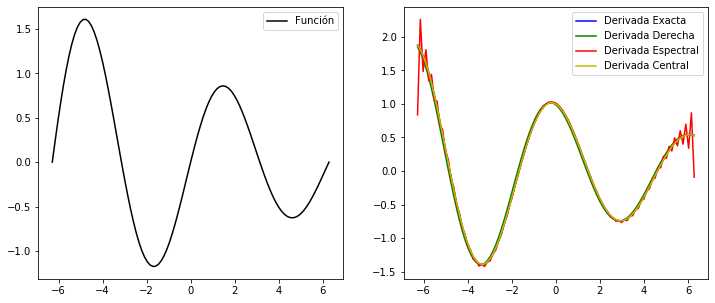

In [199]:
fig4 = plt.figure(figsize=(12,5))
ax41_ = fig4.add_subplot(1,2,1)
ax42_ = fig4.add_subplot(1,2,2)
ax41_.plot(x,y,c='k',label='Función')
ax42_.plot(x,Dy,c='b',label='Derivada Exacta')
ax42_.plot(x,Ddy,c='g',label='Derivada Derecha')
ax42_.plot(x,Dey,c='r',label='Derivada Espectral')
ax42_.plot(x,Dcy,c='y',label='Derivada Central')
ax41_.legend(loc = 'upper right')
ax42_.legend(loc = 'upper right')

# 1.5 Manchas Solares

In [11]:
filename = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionales/ManchasSolares.dat'
data = np.loadtxt(filename)

In [16]:
condition = False
i = 0
while condition == False:
    if data[i,0]==1900:
        print(i)
        condition = True
    i +=1

3480


In [17]:
dt = data[i-1:,:5]
N = dt.shape[0]

In [18]:
Datos = dt[:,3]
t = np.linspace(1900,1995,len(Datos))

In [19]:
median = stats.median(Datos)
Datos1 = Datos.copy() - median

In [20]:
freq = np.fft.fftfreq(len(Datos1))
fft = np.fft.fft(Datos1)
YMag = np.abs(fft) / len(Datos1)
freq2 = freq[0:int(len(Datos1)/2+1)]
YMag2  = 2.0*YMag[0:int(len(Datos1)/2+1)]

<StemContainer object of 3 artists>

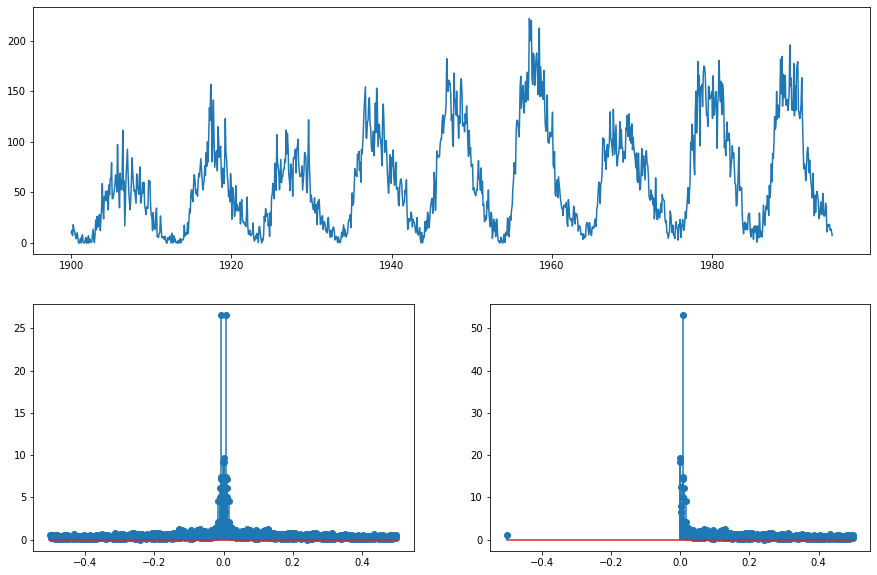

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,2,3)
ax2 = fig.add_subplot(2,2,4)
ax.plot(t,Datos)
ax1.stem(freq,YMag,use_line_collection=True)
ax2.stem(freq2,YMag2,use_line_collection=True)

In [22]:
ii = np.argmax(np.abs(YMag))
Frecuencia = freq2[ii]
Periodo = (1/freq2[ii])/12

In [23]:
print('El periodo de las manchas solares en años es de ' + str(round(Periodo,2)))

El periodo de las manchas solares en años es de 10.67


In [24]:
inverso = fft.copy()

In [25]:
mask1 = freq > freq[ii]
inverso[mask1] = 0

In [26]:
mask2 = freq < freq[ii]
inverso[mask2] = 0

In [27]:
Fundamental = np.fft.ifft(2*inverso)
Fundamental += median

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


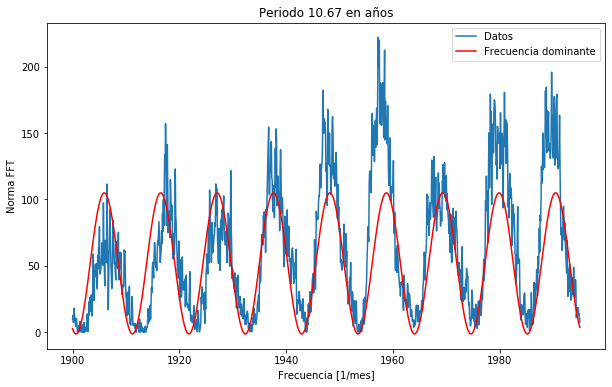

In [28]:
fig1 = plt.figure(figsize=(10,6))
ax_ = fig1.add_subplot(1,1,1)
ax_.plot(t,Datos, label = 'Datos')
ax_.plot(t,Fundamental,color='r', label = 'Frecuencia dominante')
ax_.set_title('Periodo ' + str(round(Periodo,2)) + ' en años')
ax_.set_xlabel('Frecuencia [1/mes]') 
ax_.set_ylabel('Norma FFT') 
ax_.legend(loc = 'upper right')